<a href="https://colab.research.google.com/github/mariajosemv/Exploring-the-Bitcoin-Cryptocurrency-Market/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Settings

In this analysis, we will explore the principal cryptocurrencies market capitalization and their volatility using some familiarities and differences that every coin has, so we can aggroup them and get insights according to that. For that reason, the data visualization is an inherent tool that will be exploited using [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/DataCamp-Projects/exploring-cryptocurrencies'
%ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/DataCamp-Projects/exploring-cryptocurrencies
eda_cryptocurrencies.ipynb  getting_data_from_api.ipynb


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting the proper palette for categorical data
palette = sns.color_palette('Set1')

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

# Exploratory Data Analysis

In [ ]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
jan10 = pd.read_csv('/datasets/coinmarketcap_10_01_2021.csv')

# Selecting the 'name' and the 'market_cap_usd' columns
cap = jan10[['name', 'market_cap']]

# Counting the number of values
cap.count()

name          1000
market_cap    1000
dtype: int64

## How big is Bitcoin compared with the rest of the cryptocurrencies?

At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.

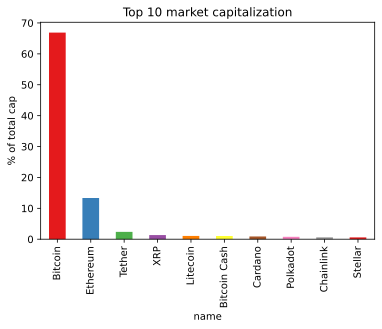

In [ ]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index('name')

# Calculating market_cap_perc for each coin using the data from the total market coin
cap10['market_cap_perc'] = cap10['market_cap'].apply(lambda x: ( x / cap['market_cap'].sum() ) * 100 ) 

# Plotting the barplot with the title defined above 
ax = cap10['market_cap_perc'].plot.bar(color=palette)

# Annotating the y axis with the label defined above
ax.set_title(TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL);

## Making the plot easier to read and more informative

While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log10 scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative$^1$.

For the colors rationale we can group the coins according to some familiarities, for example:


- Ethereum and Cardano both offer Turing Complete smart contracts.
- Bitcoin-cash is a fork of the bitcoin blockchain2.
- Ripple (XRP), Stellar, and Polkadot are not minable.
- Thether, Litecoin, and Chainlink get their own color.

---
$^1$ This coloring is a simplification. There are more differences and similarities that are not being represented here.



In [ ]:
characteristics = []

for x in list(cap10.index):
    if x in ['Ethereum', 'Cardano']:
        characteristics.append('Turing complete')
    elif x in ['Bitcoin Cash', 'Bitcoin']:
        characteristics.append('blockchain2')
    elif x in ['XRP', 'Stellar', 'Polkadot']:
        characteristics.append('Not minable')
    else: 
         characteristics.append('Other') 
            
cap10['Characteristics'] = characteristics

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


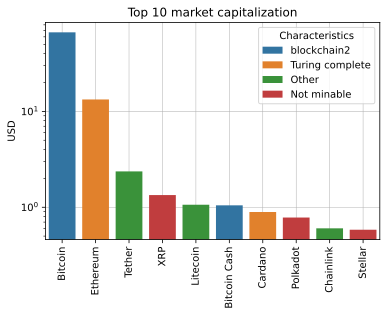

In [ ]:
g = sns.barplot(cap10.index, 'market_cap_perc', 
            data=cap10,
            hue='Characteristics',
            dodge=False)

g.set_yscale("log")
g.set(ylabel="USD",xlabel='')
g.set_title(TOP_CAP_TITLE)
g.axes.set_axisbelow(True)

plt.xticks(rotation=90)
plt.grid(linewidth=0.5)

The improvement in the data visualization let us appreciate that in the cryptocurrencies business, the top 10 market capitalization coins **have not an exclusive one characteristic in common**: it is not necessarily required to have, for example, Turing complete smart contracts to achieve bigs market capitalizations. As we have seen above, neither Bitcoin nor Tether has Turing complete smart contracts, and still, they arise the top 10 market cap.

The plot shows that there is not a simple pattern that the most successful cryptocurrency follow, from there may reside their well-known volatility. 

## What is going on?! Volatility in cryptocurrencies

Now that we have mentioned the volatility, let's explore them a bit more. We will begin by selecting and plotting the 24 hours and seven days percentage change, which we already have available.

In [ ]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = jan10[['slug', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'slug' and dropping all NaN rows
volatility = volatility.set_index('slug')

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(by=['percent_change_24h'], ascending=True)

# Checking the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
slug,,
extstock-token,-98.542209,-98.217649
peepcoin,-61.212836,5183.778708
jobchain,-57.364389,-37.109662
metrix-coin,-54.692619,16.376056
inflationcoin,-54.228459,12.615195


## Well, we can already see that things are a bit crazy

It seems you can lose a lot of money quickly on cryptocurrencies, like the 98% of your investment in the worst case. But what about the gains? Let's explore them through data visualization again by plotting the top 10 biggest gainers and top 10 losers in market capitalization. 

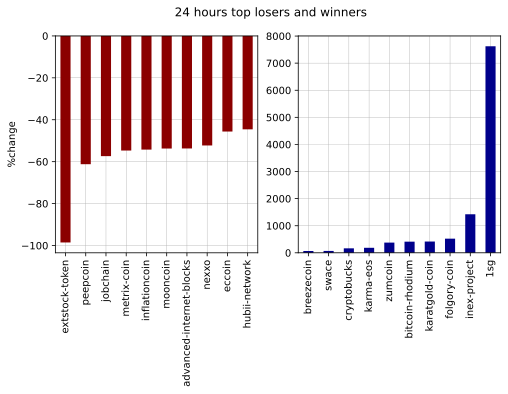

In [ ]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    
    # Plotting with pandas the barchart for the top 10 losers
    volatility_series[:10].plot.bar(ax=axes[0], color='darkred')
    
    # Same as above, but for the top 10 winners
    volatility_series[-10:].plot.bar(ax=axes[1], color='darkblue')
    
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    
    # Setting labels and grids
    
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    axes[0].set_ylabel('%change')
    
    axes[0].grid(linewidth=0.4)
    axes[1].grid(linewidth=0.4)
    
    axes[0].set_axisbelow(True)
    axes[1].set_axisbelow(True)
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

## Ok, those are... interesting. 
8000% daily increase?! It seems that with some random coins you can earn a lot of money.
But on other hand, you can lose your entire money as well, see for example the extsock-token case. We must take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time.

## Let's check the weekly Series too.

After calming down, let's reuse the function defined above to see what is going weekly instead of daily.

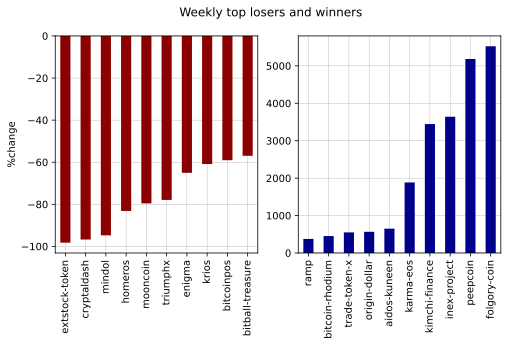

In [ ]:
# Sorting in ascending order
volatility7d = volatility.sort_values(by=['percent_change_7d'], ascending=True)

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

## What are those cryptocurriencies?

The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, ***the smaller the capitalization, the bigger the risk and reward.***

Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones$^2$. Let's classify our dataset based on Investopedia's capitalization [definitions](https://www.investopedia.com/video/play/large-cap/) for company stocks:

- [Large cap](https://www.investopedia.com/terms/l/large-cap.asp): +10 billion
- [Mid cap](https://www.investopedia.com/terms/m/midcapstock.asp): 2 billion - 10 billion
- [Small cap](https://www.investopedia.com/terms/s/small-cap.asp): 300 million - 2 billion
- [Micro cap](https://www.investopedia.com/terms/m/microcapstock.asp): 50 million - 300 million
- [Nano cap](https://www.investopedia.com/terms/n/nanocap.asp): Below 50 million

---

$^2$ Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a commodity instead.

In [ ]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query('market_cap > 1e10')

# Printing out largecaps
largecaps.head()

,name,market_cap
0,Bitcoin,6.858484e+11
1,Ethereum,1.366977e+11
2,Tether,2.426499e+10
3,XRP,1.373638e+10
4,Litecoin,1.089698e+10


## Most coins are tiny

Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories. We will group the large, mid, and small cap coins into a group called biggish and make a barplot of counts of biggish, micro, and nano coins

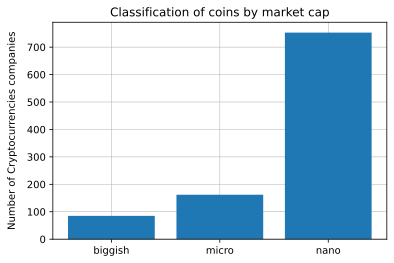

In [ ]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
def capcount(query_string):
    return cap.query(query_string).count()[0]

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
# large, mid and small
biggish = capcount('market_cap > 300e6')

# Same as above for micro ...
micro = capcount('market_cap >= 50e6 & market_cap <= 300e6')

# ... and for nano
nano =  capcount('market_cap < 50e6')

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
fig, ax = plt.subplots()

ax.bar(LABELS, values)
ax.set_ylabel('Number of Cryptocurrencies companies', labelpad=10)
ax.set_title('Classification of coins by market cap')

ax.set_axisbelow(True)
plt.grid(linewidth=0.5)